## Lesson 2. Raster Data with Python and Xarray

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import rioxarray as rxr
import earthpy as et

Prettier plotting with Seaborn

In [2]:
sns.set(font_scale=1.5, style='white')

In [3]:
data_path = et.data.get_data('colorado-flood')

Open a lidar derived DEM using <code>rioxarray</code>

In [4]:
dtm_pre_arr = rxr.open_rasterio(os.path.join(data_path,
                                             'spatial',
                                             'boulder-leehill-rd',
                                             'pre-flood',
                                             'lidar',
                                             'pre_DTM.tif'))
dtm_pre_arr

<xarray.DataArray (band: 1, y: 2000, x: 4000)>
[8000000 values with dtype=float32]
Coordinates:
  * band         (band) int32 1
  * y            (y) float64 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
  * x            (x) float64 4.72e+05 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
    spatial_ref  int32 0
Attributes:
    _FillValue:    -3.4028234663852886e+38
    scale_factor:  1.0
    add_offset:    0.0
    grid_mapping:  spatial_ref

In [5]:
type(dtm_pre_arr)

xarray.core.dataarray.DataArray

The above creates a <code>rioxarray</code> DataArray. This object stores:
 - The raster data in a numpy array
 - Spatial metadata, including the CRS and spatial extent of the object
 - Any other metadata

In [6]:
print('The CRS for this data is:', dtm_pre_arr.rio.crs)
print('The spatial extent is:', dtm_pre_arr.rio.bounds())

The CRS for this data is: EPSG:32613
The spatial extent is: (472000.0, 4434000.0, 476000.0, 4436000.0)


In [7]:
print('The nodata value is:', dtm_pre_arr.rio.nodata)

The nodata value is: -3.4028235e+38


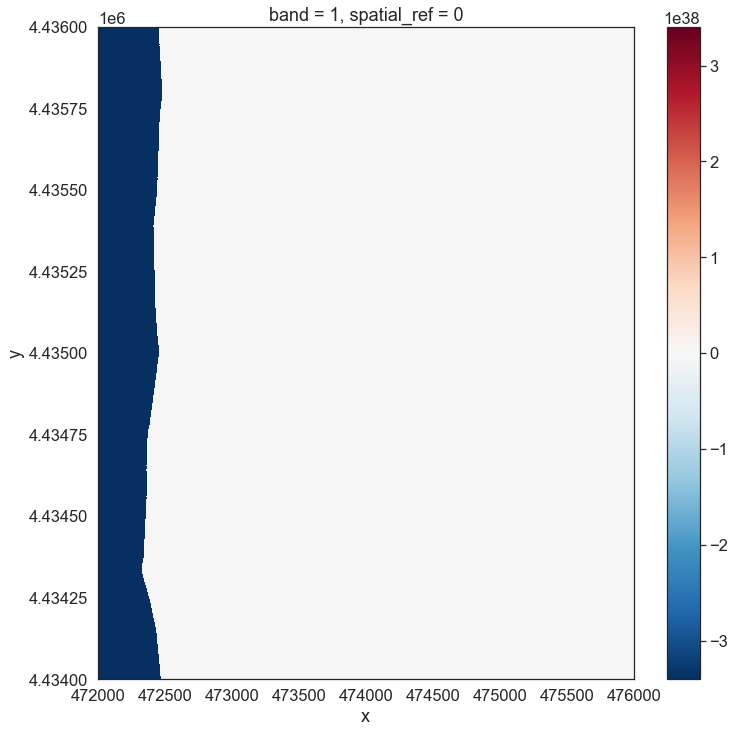

In [8]:
fig, ax = plt.subplots(figsize=(12,12))
dtm_pre_arr.plot(ax=ax)
plt.show()

The extreme elevations indicate outlier/bad data may be present

(array([ 842272.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0., 7157728.]),
 array([-3.4028235e+38, -3.0625412e+38, -2.7222588e+38, -2.3819763e+38,
        -2.0416941e+38, -1.7014117e+38, -1.3611294e+38, -1.0208470e+38,
        -6.8056469e+37, -3.4028235e+37,  2.0874299e+03], dtype=float32),
 <BarContainer object of 10 artists>)

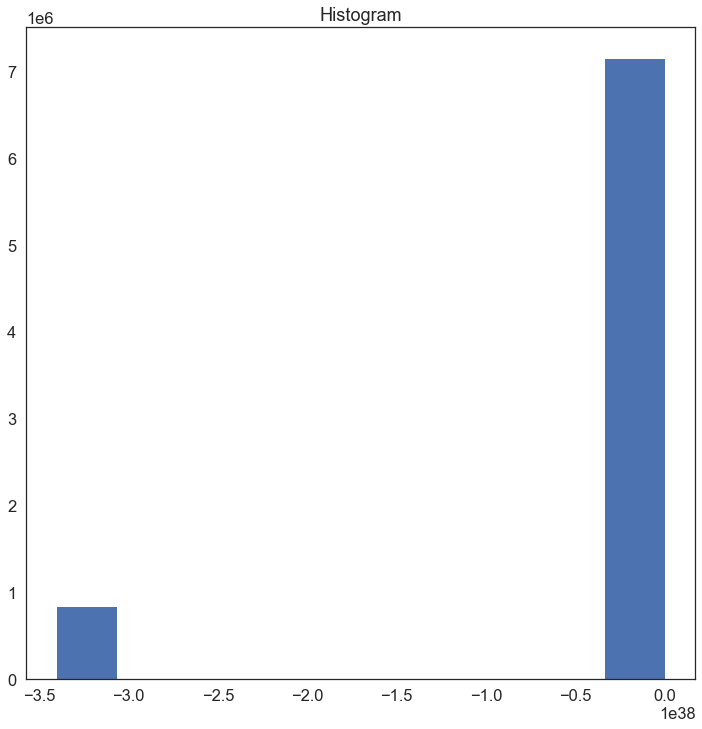

In [9]:
fig, ax = plt.subplots(figsize=(12,12))
dtm_pre_arr.plot.hist(ax=ax)
plt.show()

In [10]:
print('The minimum value in the raster is', np.nanmin(dtm_pre_arr.values))
print('The maximum value in the raster is', np.nanmax(dtm_pre_arr.values))

The minimum value in the raster is -3.4028235e+38
The maximum value in the raster is 2087.43


In [11]:
dtm_pre_arr_masked = rxr.open_rasterio(os.path.join(data_path,
                                                    'spatial',
                                                    'boulder-leehill-rd',
                                                    'pre-flood',
                                                    'lidar',
                                                    'pre_DTM.tif'),
                                       masked=True)
dtm_pre_arr_masked.shape

(1, 2000, 4000)

<code>.squeeze()</code> reduced the third dimension given there is only one band/layer to this data

In [12]:
dtm_pre_arr = rxr.open_rasterio(os.path.join(data_path,
                                             'spatial',
                                             'boulder-leehill-rd',
                                             'pre-flood',
                                             'lidar',
                                             'pre_DTM.tif'),
                                 masked=True).squeeze()
dtm_pre_arr.shape

(2000, 4000)

Text(0.5, 1.0, 'Lidar Digital Elevation Model (DEM)\nBoulder Flood 2013')

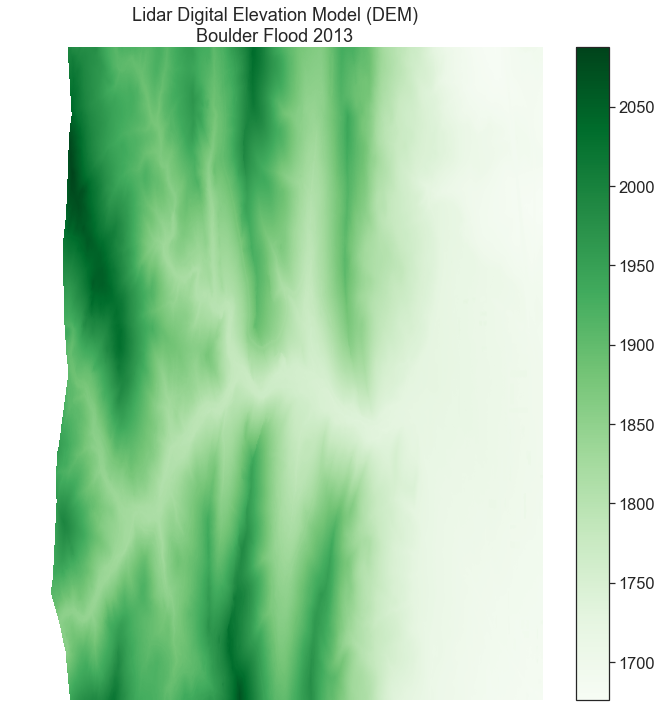

In [13]:
f, ax = plt.subplots(figsize=(12,12))

dtm_pre_arr.plot(cmap='Greens',
                 ax=ax)
ax.set_title('Lidar Digital Elevation Model (DEM)\nBoulder Flood 2013')
ax.set_axis_off()
plt.show()

(array([539920., 920387., 425574., 329671., 296494., 318871., 379982.,
        457104., 531940., 549370., 572833., 562835., 399854., 287543.,
        203046., 143991., 107776.,  72195.,  42899.,  15443.]),
 array([1676.20996094, 1696.77095947, 1717.33195801, 1737.89295654,
        1758.45395508, 1779.01495361, 1799.57595215, 1820.13695068,
        1840.69794922, 1861.25894775, 1881.81994629, 1902.38094482,
        1922.94194336, 1943.50294189, 1964.06394043, 1984.62493896,
        2005.1859375 , 2025.74693604, 2046.30793457, 2066.86893311,
        2087.42993164]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'Histogram of the data with nodata values removed')

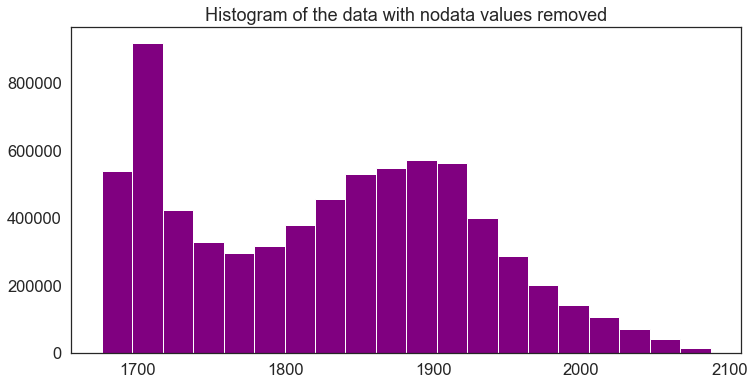

In [14]:
f, ax = plt.subplots(figsize=(12,6))

dtm_pre_arr.plot.hist(color='purple',
                      bins=20)
ax.set_title('Histogram of the data with nodata values removed')
plt.show()

In [15]:
print('The minimum value in the raster is', np.nanmin(dtm_pre_arr.values))
print('The maximum value in the raster is', np.nanmax(dtm_pre_arr.values))

The minimum value in the raster is 1676.2099609375
The maximum value in the raster is 2087.429931640625


**Plot Raster and Vector Data Together**

In [16]:
site_bdy_path = os.path.join(data_path,
                             'spatial',
                             'boulder-leehill-rd',
                             'clip-extent.shp')
site_bdy = gpd.read_file(site_bdy_path)

<AxesSubplot:>

[Text(0.5, 1.0, 'Site Boundary Layer')]

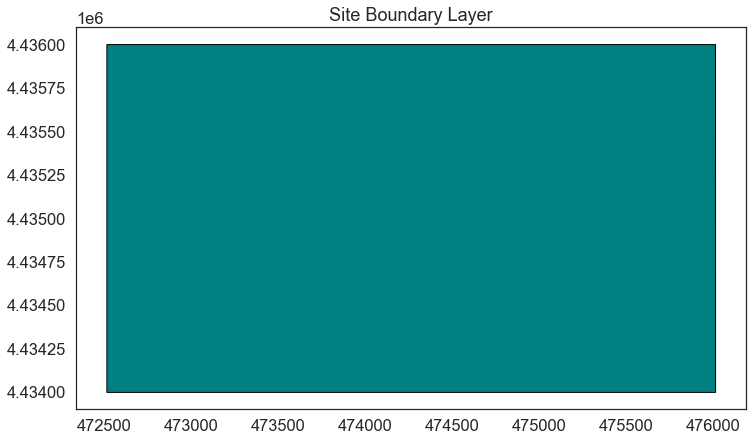

In [17]:
f, ax = plt.subplots(figsize=(12,12))

site_bdy.plot(ax=ax,
              color='teal',
              edgecolor='black')
ax.set(title='Site Boundary Layer')
plt.show()

Plot the two datasets together to begin to create a map

<AxesSubplot:title={'center':'band = 1, spatial_ref = 0'}, xlabel='x', ylabel='y'>

[Text(0.5, 1.0, 'Raster Layer with Vector Overlay')]

(472000.0, 476210.9883720931, 4434000.0, 4436000.0)

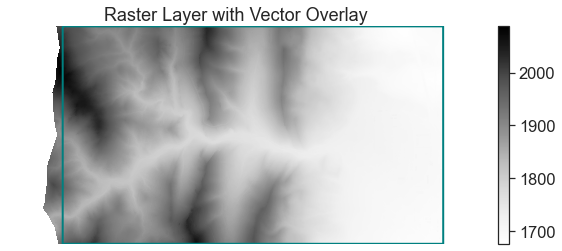

In [21]:
f, ax = plt.subplots(figsize=(12,4))

dtm_pre_arr.plot.imshow(cmap='Greys',
                        ax=ax)
site_bdy.plot(color='None',
              edgecolor='teal',
              linewidth=2,
              ax=ax,
              zorder=4)
ax.set(title='Raster Layer with Vector Overlay')
ax.axis('off')
plt.show()